In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [51]:
data = pd.read_csv("./Customer Purchasing Behaviors.csv", index_col='user_id')
data.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
user_id,,,,,,
1,25,45000,200,4.5,North,12
2,34,55000,350,7.0,South,18
3,45,65000,500,8.0,West,22
4,22,30000,150,3.0,East,10
5,29,47000,220,4.8,North,13


In [71]:
data.describe()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,38.676471,57407.563025,425.630252,6.794118,19.798319
std,9.351118,11403.875717,140.052062,1.899047,4.562884
min,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,46.750000,66750.000000,527.500000,8.275000,23.000000
max,55.000000,75000.000000,640.000000,9.500000,28.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 1 to 238
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 238 non-null    int64  
 1   annual_income       238 non-null    int64  
 2   purchase_amount     238 non-null    int64  
 3   loyalty_score       238 non-null    float64
 4   region              238 non-null    object 
 5   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 13.0+ KB


In [53]:
data.isna().sum()

age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [54]:
data.duplicated().sum()

np.int64(178)

In [55]:
# data = data[~data.duplicated()]

In [56]:
data.shape

(238, 6)

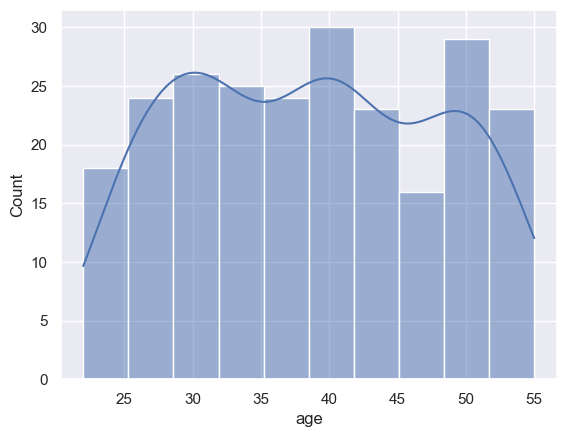

In [70]:
sns.histplot(data=data['age'], kde=True, bins=10)
plt.show()

***Insight***: People with age between 35 and 45 are more

<Axes: ylabel='age'>

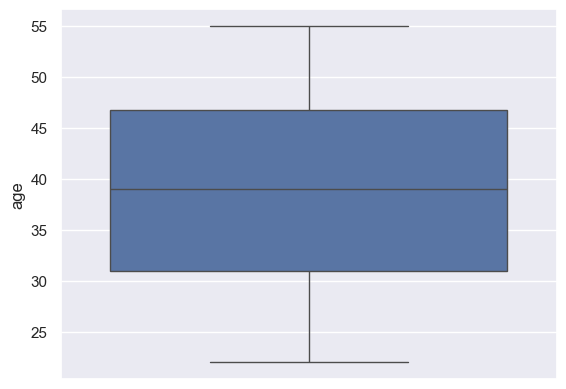

In [58]:
sns.boxplot(data=data['age'])

***Insight***: 
1. Minimum age of a Person is 22
2. Maximum age of a person is 55
3. 25% of people are below age 31
4. 50% of people are below age 39
5. 75% of people are below age 47

In [59]:
data['age_grp'] = pd.cut(data['age'], bins= [0, 12, 18, 35, 60, 100], labels = ['Children (0-11)', 'Teenager (12-17)', 'Young Adult (18-34)', 'Adult (35-59)', 'Senior (60+)'])

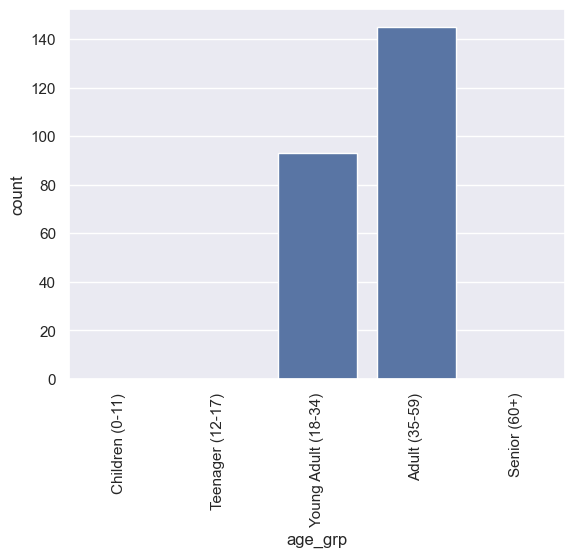

In [60]:
sns.countplot(data=data, x=data['age_grp'])
plt.xticks(rotation = 90)
plt.show()

***Insight***: Number of Adults are more

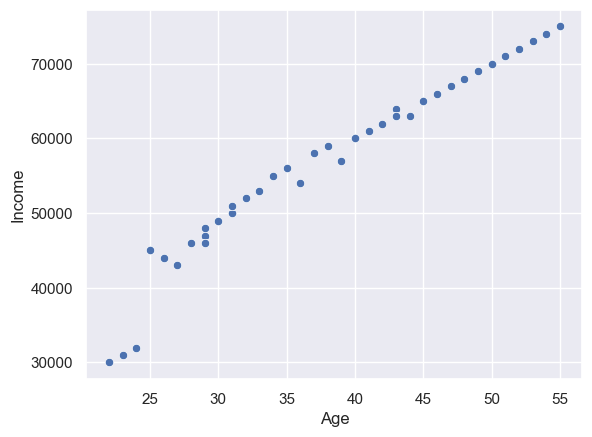

In [61]:
sns.scatterplot(data=data, x=data['age'], y=data['annual_income'])
plt.xlabel('Age'); plt.ylabel("Income");
plt.show()

***Insight***: As the age increase Income also increase

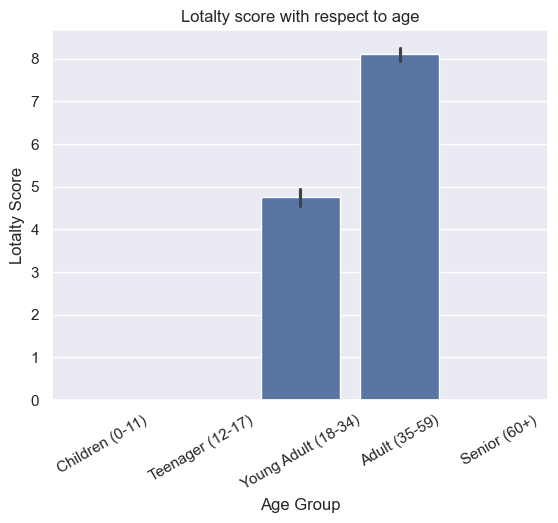

In [62]:
sns.barplot(data=data, x=data['age_grp'], y=data['loyalty_score'])
plt.xticks(rotation = 30)
plt.xlabel("Age Group")
plt.ylabel("Lotalty Score")
plt.title("Lotalty score with respect to age")
plt.show()

***Insight***: Adults are more loyal than youngers

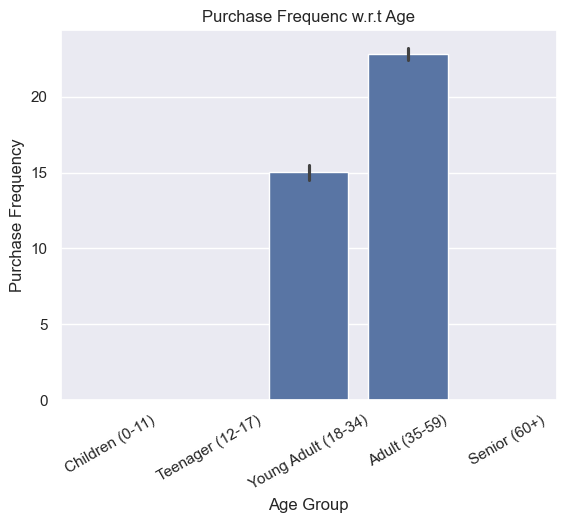

In [67]:
sns.barplot(x=data['age_grp'], y=data['purchase_frequency'])
plt.xticks(rotation = 30); plt.xlabel("Age Group"); plt.ylabel("Purchase Frequency"); plt.title("Purchase Frequenc w.r.t Age")
plt.show()

***Insight***:Adults Purchase Frequency is more than anyone else.

<Axes: >

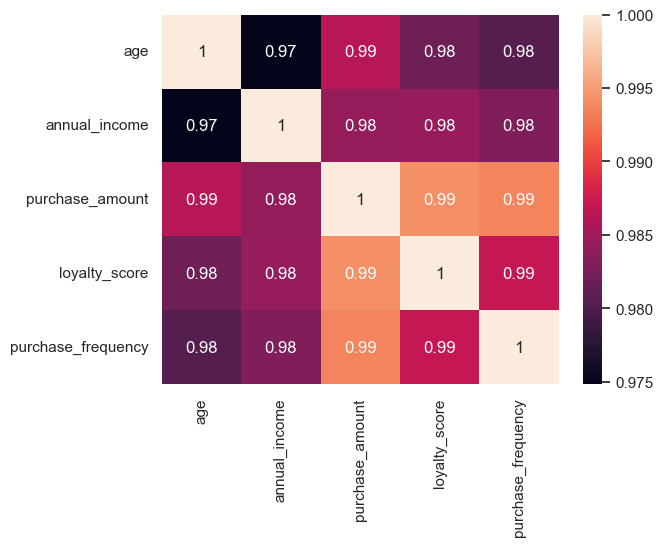

In [78]:
sns.heatmap(data=data.select_dtypes(include=['int', 'float']).corr(), annot=True)

In [79]:
data['region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [81]:
data = pd.get_dummies(data=data)

In [83]:
X = data.drop(columns=['loyalty_score'])
y = data['loyalty_score']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
model.score(X=X_train, y = y_train)

0.9932329480835749

In [89]:
model.score(X=X_test, y = y_test)

0.9936317179068702